In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
import seaborn as sns


In [2]:
def get_dist(x1,x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def neighbourhood_points(X, x_centroid, dist_threshold = 5):
    eligible_X = []
    for x in X:
        dist = get_dist(x, x_centroid)
        if dist < dist_threshold:
            eligible_X.append(x)
    return eligible_X

def kernel(distance, bandwidth):
    val = (1/(bandwidth*np.sqrt(2*np.pi)))*np.exp(-0.5*((distance/bandwidth))**2)
    return val

(-15, 15)

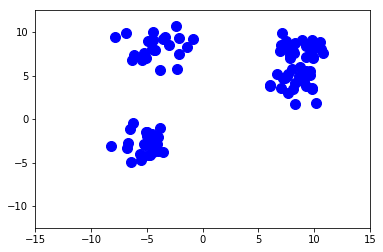

In [3]:
original_X, X_shapes = make_blobs(100, 2, centers=4, cluster_std=1.3)
plt.plot(original_X[:,0], original_X[:,1], 'bo', markersize = 10)
plt.ylim(bottom = -12.5, top = 12.5)
plt.xlim(left = -15, right = 15)

In [4]:
look_distance = 6
kernel_bandwidth = 4

In [5]:
X = np.copy(original_X)

past_X = []
n_iterations = 5
for _ in range(n_iterations):
    for i, x in enumerate(X):
        neighbours = neighbourhood_points(X, x, look_distance)
        
        numerator = 0
        denominator = 0
        for n in neighbours:
            dist = get_dist(n, x)
            weight = kernel(dist, kernel_bandwidth)
            numerator += (weight * n)
            denominator += weight
            
        new_x = numerator/denominator
        
        X[i] = new_x
        
    past_X.append(np.copy(X))

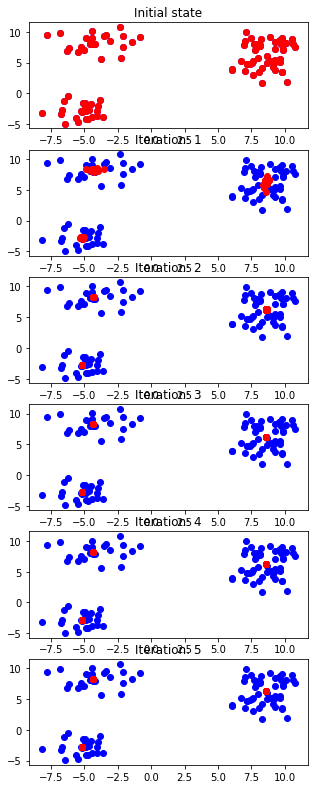

In [6]:
figure = plt.figure(1)
figure.set_size_inches((5, 16))
plt.subplot(n_iterations + 2, 1, 1)
plt.title('Initial state')
plt.plot(original_X[:,0], original_X[:,1], 'bo')
plt.plot(original_X[:,0], original_X[:,1], 'ro')

for i in range(n_iterations):
    figure_index = i + 2
    plt.subplot(n_iterations + 2, 1, figure_index)
    plt.title('Iteration: %d' % (figure_index - 1))
    plt.plot(original_X[:,0], original_X[:,1], 'bo')
    plt.plot(past_X[i][:,0], past_X[i][:,1], 'ro')

In [8]:
ms = MeanShift(bandwidth = 3.5, cluster_all = False)
ms.fit(original_X)

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

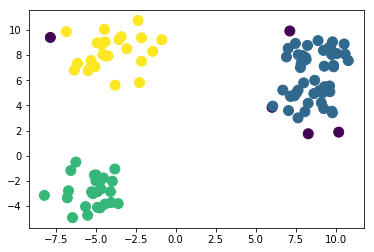

In [9]:
plt.scatter(original_X[:,0], original_X[:,1], s = 100, c = labels)


C:\Users\colesr\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


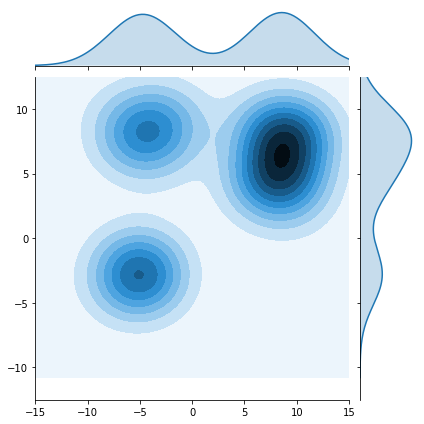

In [10]:
original_X[:,0]
sns.jointplot(x=original_X[:,0], y = original_X[:,1], kind = "kde", xlim=[-15,15], ylim=[-12.5,12.5])